Airline Passenger Satisfaction Analysis


1. Imports

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import os


2. Data

In [57]:
train_data = pd.read_csv('train.csv', index_col='id')
test_data = pd.read_csv('test.csv', index_col='id')

train_data.drop(columns=['Unnamed: 0'], inplace=True)
test_data.drop(columns=['Unnamed: 0'], inplace=True)

In [58]:
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [59]:
test_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied



3. EDA

In [60]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 70172 to 62567
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    103904

In [61]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25976 entries, 19556 to 34799
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int6

3.1. Fill missing values

In [62]:
train_data.isna().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [63]:
test_data.isna().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [64]:
train_data = train_data.copy()
train_data['Arrival Delay in Minutes'] = train_data['Arrival Delay in Minutes'].fillna(train_data['Arrival Delay in Minutes'].median())

test_data = test_data.copy()
test_data['Arrival Delay in Minutes'] = test_data['Arrival Delay in Minutes'].fillna(test_data['Arrival Delay in Minutes'].median())

print(train_data['Arrival Delay in Minutes'].isnull().sum())
print(test_data['Arrival Delay in Minutes'].isnull().sum())

0
0


3.2. Label Encoding

In [65]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    test_data[column] = le.transform(test_data[column])
    label_encoders[column] = le

train_data['satisfaction'] = train_data['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
test_data['satisfaction'] = test_data['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

In [66]:
if not os.path.exists('EDA'):
    os.makedirs('EDA')

def save_plot(fig, filename, save=True):
    if save:
        fig.savefig(os.path.join('EDA', filename))

def plot_histograms(data, save=True):
    numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
    fig, axes = plt.subplots(len(numeric_columns) // 3 + 1, 3, figsize=(20, 15))
    axes = axes.flatten()
    for i, col in enumerate(numeric_columns):
        data[col].hist(bins=30, ax=axes[i])
        axes[i].set_title(col)
    plt.tight_layout()
    save_plot(fig, 'histograms.png', save)
    plt.show()

def plot_boxplots(data, column, save=True):
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.boxplot(x='satisfaction', y=column, data=data, ax=ax)
    plt.title(f'{column} vs Satisfaction')
    save_plot(fig, f'boxplot_{column}_satisfaction.png', save)
    plt.show()

def plot_correlation_matrix(data, save=True):
    corr_matrix = data.corr()
    fig, ax = plt.subplots(figsize=(16, 12))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=ax)
    plt.title('Correlation Matrix')
    save_plot(fig, 'correlation_matrix.png', save)
    plt.show()
def perform_eda(data, save=True):

    plot_histograms(data, save)

    plot_boxplots(data, 'Age', save)
    plot_boxplots(data, 'Flight Distance', save)
    plot_boxplots(data, 'Departure Delay in Minutes', save)
    plot_boxplots(data, 'Arrival Delay in Minutes', save)

    plot_correlation_matrix(data, save)

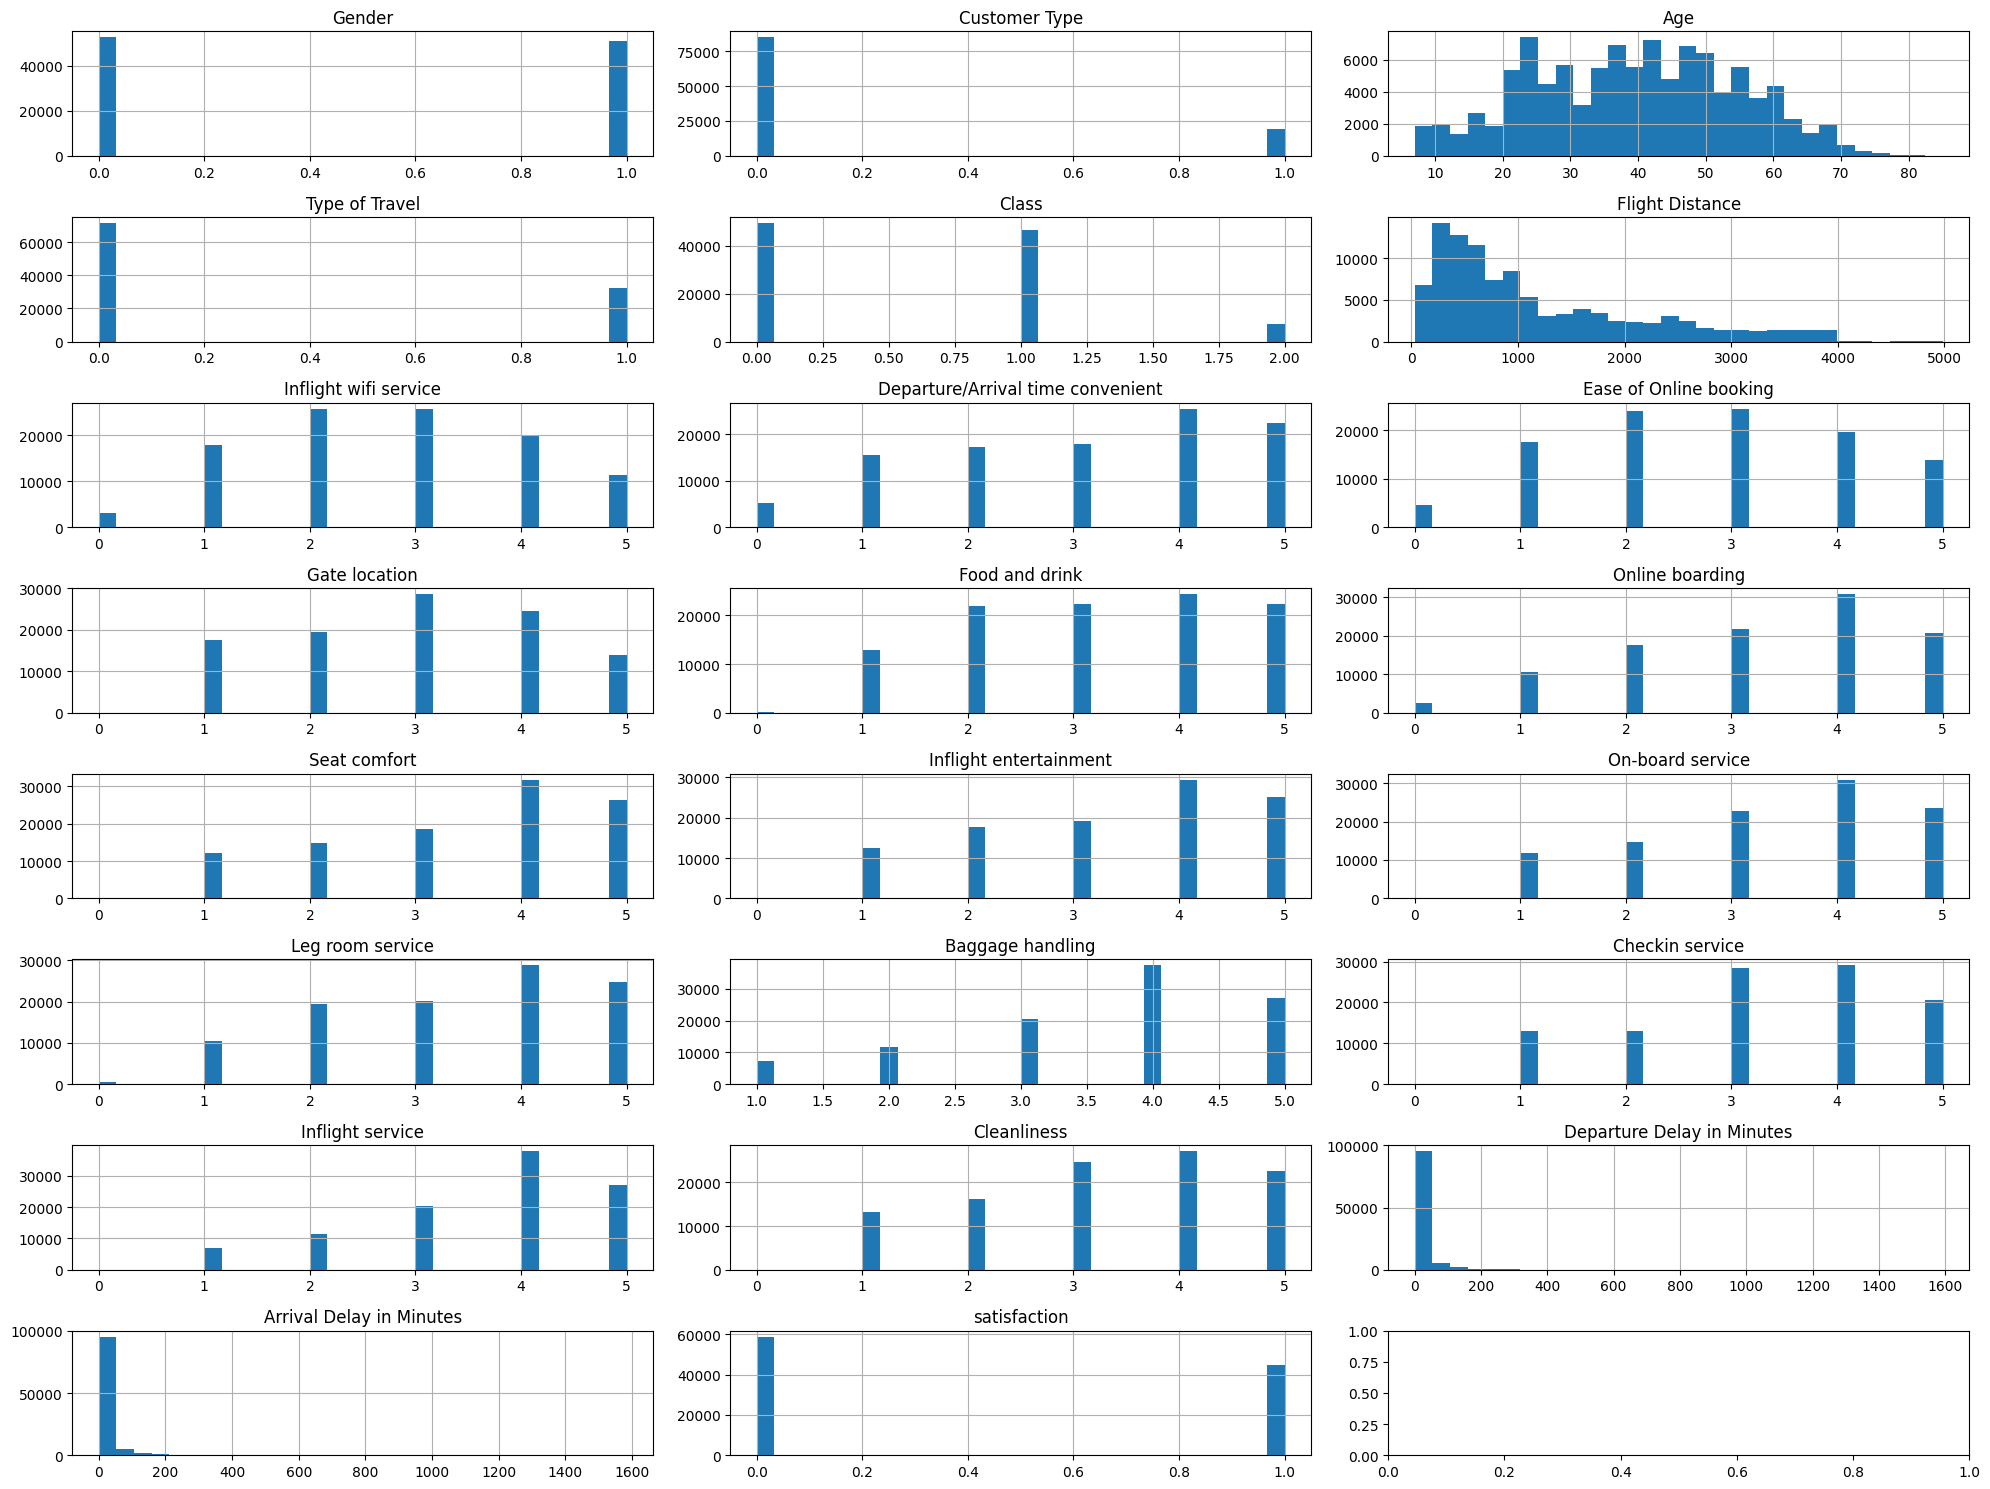

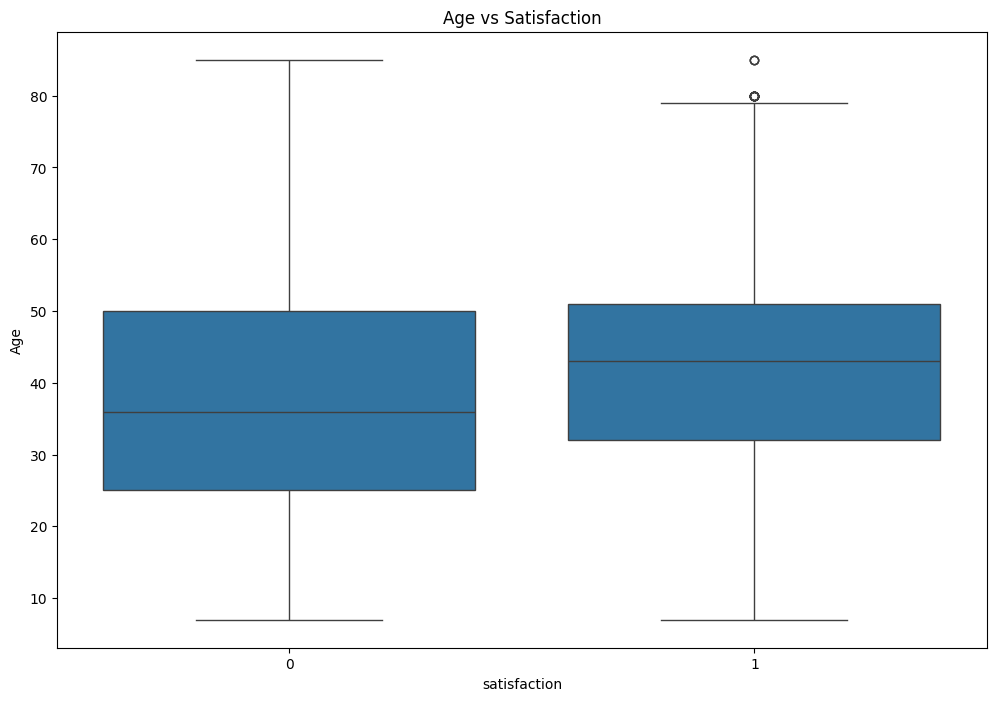

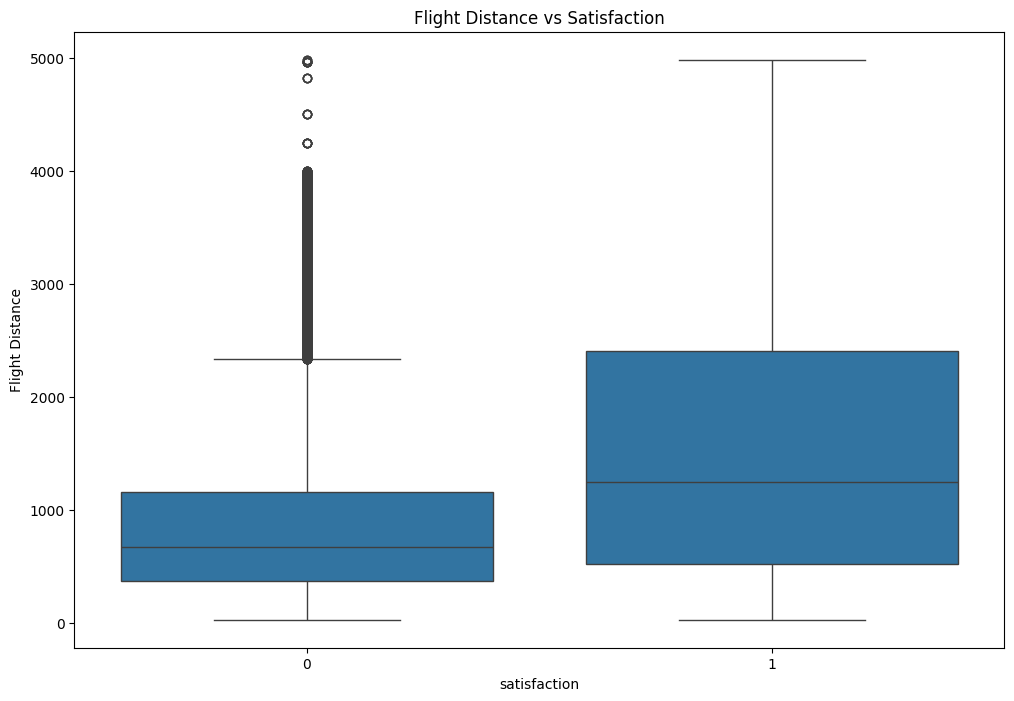

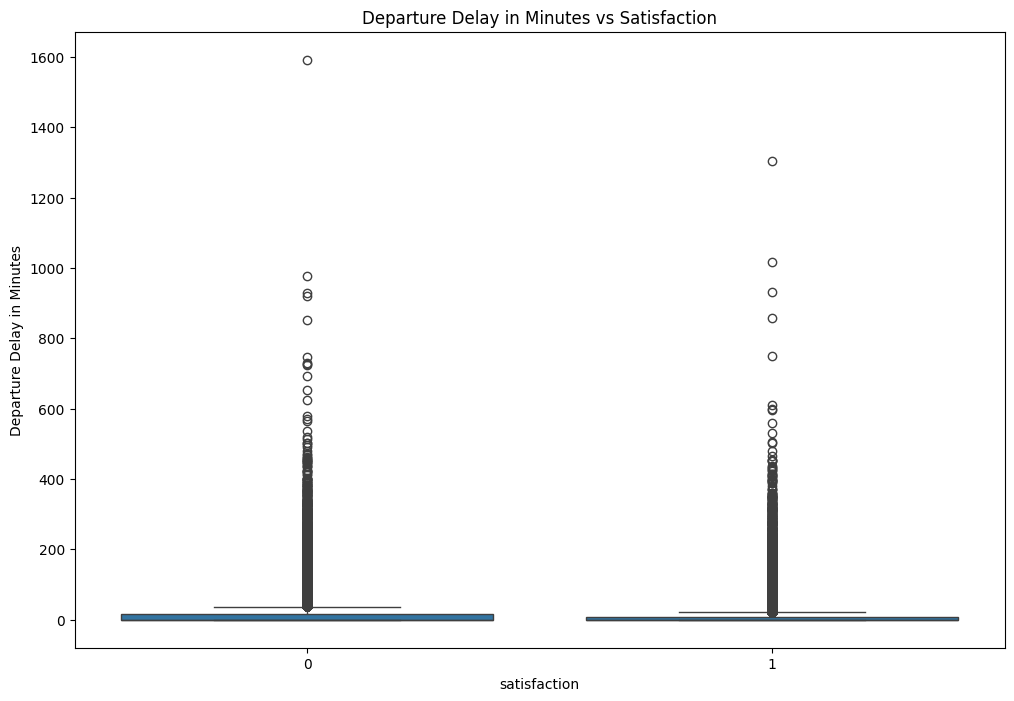

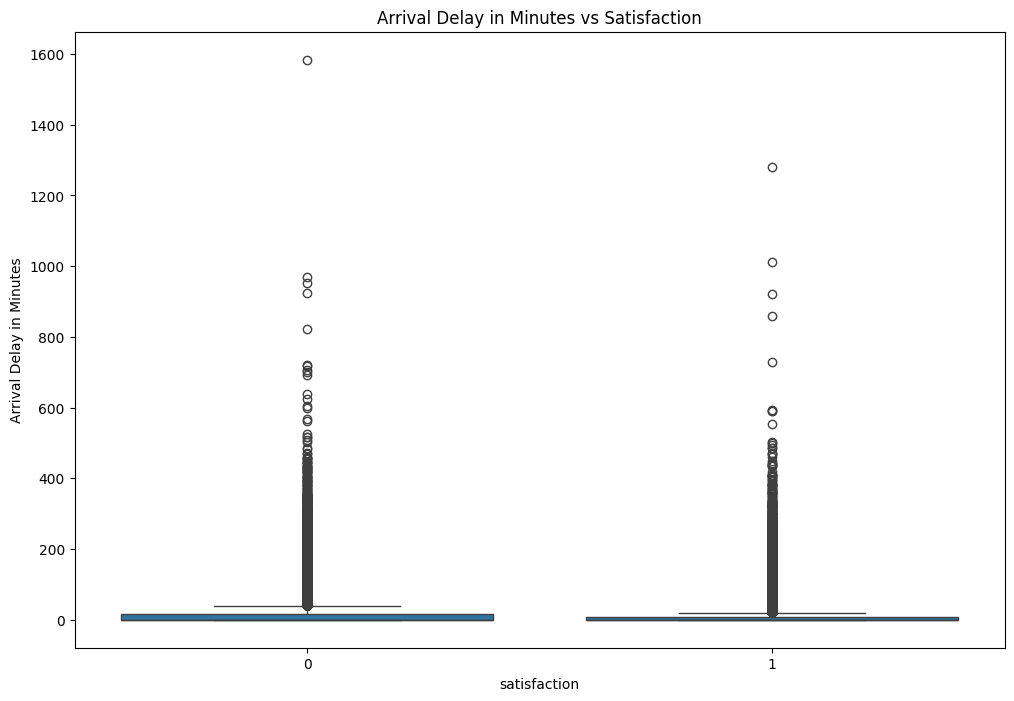

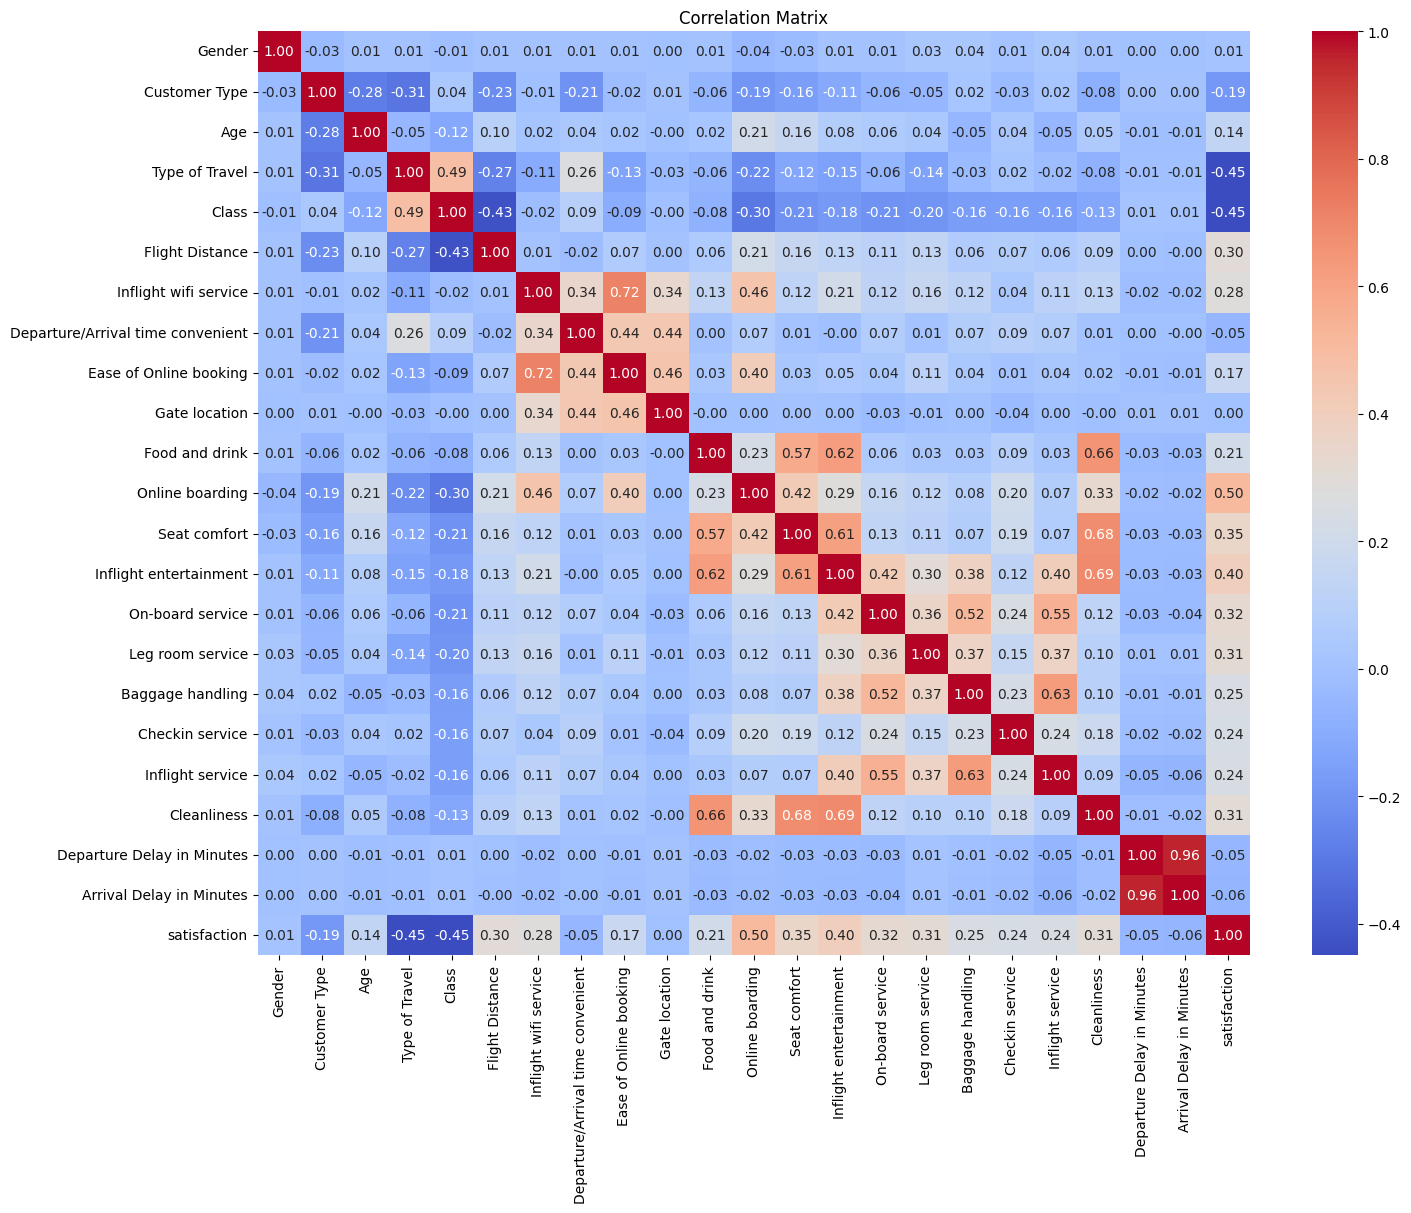

In [67]:
perform_eda(train_data)


3.3. Scaling numerical features

In [68]:
from sklearn.preprocessing import StandardScaler

numeric_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop('satisfaction')  # Wykluczanie zmiennej docelowej

scaler = StandardScaler()

train_data[numeric_columns] = scaler.fit_transform(train_data[numeric_columns])

test_data[numeric_columns] = scaler.transform(test_data[numeric_columns])

In [69]:
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,1.015031,-0.472767,-1.745279,1.490614,2.264618,-0.731539,0.203579,0.616172,0.173776,-1.547323,...,1.231704,0.479403,-0.26684,0.311769,0.549799,1.156436,1.305870,0.266393,0.074169,0
5047,1.015031,2.115208,-0.951360,-0.670865,-0.957054,-0.957184,0.203579,-0.695245,0.173776,0.018094,...,-1.769081,-1.849161,1.25338,-0.535045,-1.821012,0.305848,-1.742292,-0.361375,-0.236313,0
110028,-0.985192,-0.472767,-0.885200,-0.670865,-0.957054,-0.047584,-0.549533,-0.695245,-0.541060,-0.764614,...,1.231704,0.479403,-0.26684,0.311769,0.549799,0.305848,1.305870,-0.387532,-0.391554,1
24026,-0.985192,-0.472767,-0.951360,-0.670865,-0.957054,-0.629246,-0.549533,1.271880,1.603448,1.583511,...,-1.018885,-1.072973,1.25338,-0.535045,-1.821012,0.305848,-0.980251,-0.099805,-0.158692,0
119299,1.015031,-0.472767,1.430397,-0.670865,-0.957054,-0.978244,0.203579,-0.039537,0.173776,0.018094,...,-0.268688,-0.296785,0.49327,0.311769,-0.240472,-0.544740,-0.218211,-0.387532,-0.391554,1


In [70]:
test_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
19556,-0.985192,-0.472767,0.834958,-0.670865,0.653782,-1.032398,1.709804,0.616172,0.173776,0.800803,...,1.231704,1.255590,1.253380,1.158582,-1.030742,1.156436,1.305870,0.920317,0.746880,1
90035,-0.985192,-0.472767,-0.223601,-0.670865,-0.957054,1.678348,-1.302646,-1.350954,0.173776,-1.547323,...,0.481508,0.479403,0.493270,0.311769,-0.240472,0.305848,1.305870,-0.387532,-0.391554,1
12360,1.015031,2.115208,-1.282160,-0.670865,0.653782,-1.000307,-0.549533,-2.006662,-0.541060,0.800803,...,-1.018885,0.479403,-1.787061,-0.535045,-1.030742,-1.395328,-0.980251,-0.387532,-0.391554,0
77959,1.015031,-0.472767,0.305678,-0.670865,-0.957054,2.193821,-2.055758,-2.006662,-1.970731,-0.764614,...,-1.769081,-1.849161,-1.787061,-2.228672,-0.240472,-2.245916,0.543829,-0.387532,-0.236313,1
36875,-0.985192,-0.472767,0.636478,-0.670865,0.653782,-0.007470,-0.549533,-0.039537,0.888612,0.018094,...,-1.018885,-1.072973,-1.026951,-1.381858,0.549799,-1.395328,0.543829,-0.387532,0.125916,1



3.4. Selecting best features

In [71]:
from sklearn.feature_selection import SelectKBest, f_classif

corr_matrix = pd.DataFrame(train_data).corr()
corr_with_target = corr_matrix['satisfaction'].abs().sort_values(ascending=False)
selected_features_corr = corr_with_target.index[1:11]

categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
X_categorical = pd.DataFrame(train_data)[categorical_columns]
y = pd.DataFrame(train_data)['satisfaction']

selector = SelectKBest(f_classif, k='all')
selector.fit(X_categorical, y)

scores = selector.scores_
selected_features_anova = [categorical_columns[i] for i in np.argsort(scores)[-3:]]

selected_features = list(selected_features_corr) + selected_features_anova

In [72]:
selected_features

['Online boarding',
 'Class',
 'Type of Travel',
 'Inflight entertainment',
 'Seat comfort',
 'On-board service',
 'Leg room service',
 'Cleanliness',
 'Flight Distance',
 'Inflight wifi service',
 'Customer Type',
 'Type of Travel',
 'Class']


3.5. Split datasets

In [73]:
X_train = train_data[selected_features]
X_test = test_data[selected_features]

y_train = train_data['satisfaction']
y_test = test_data['satisfaction']

X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

In [74]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_test.shape)

X_train shape: (103904, 13)
X_val shape: (25976, 13)
y_train shape: (103904,)
y_val shape: (25976,)



4. Models

In [75]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

if not os.path.exists('Models'):
    os.makedirs('Models')

if not os.path.exists('Results'):
    os.makedirs('Results')
def display_metrics(y_true, y_pred, model_name, results_dict):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")
    print("Confusion Matrix:")
    print(cm)
    print("-" * 30)

    results_dict['Model'].append(model_name)
    results_dict['Accuracy'].append(accuracy)
    results_dict['Precision'].append(precision)
    results_dict['Recall'].append(recall)
    results_dict['F1 Score'].append(f1)
    results_dict['ROC AUC'].append(roc_auc)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.savefig(f'Results/confusion_matrix_{model_name}.png')
    plt.show()

    plt.close()

In [76]:
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}


4.1. Logistic regression

In [77]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

Metrics for Logistic Regression:
Accuracy: 0.8609870649830613
Precision: 0.8528346314073537
Recall: 0.82583530649829
F1 Score: 0.8391178436177322
ROC AUC Score: 0.8571638619913393
Confusion Matrix:
[[12948  1625]
 [ 1986  9417]]
------------------------------


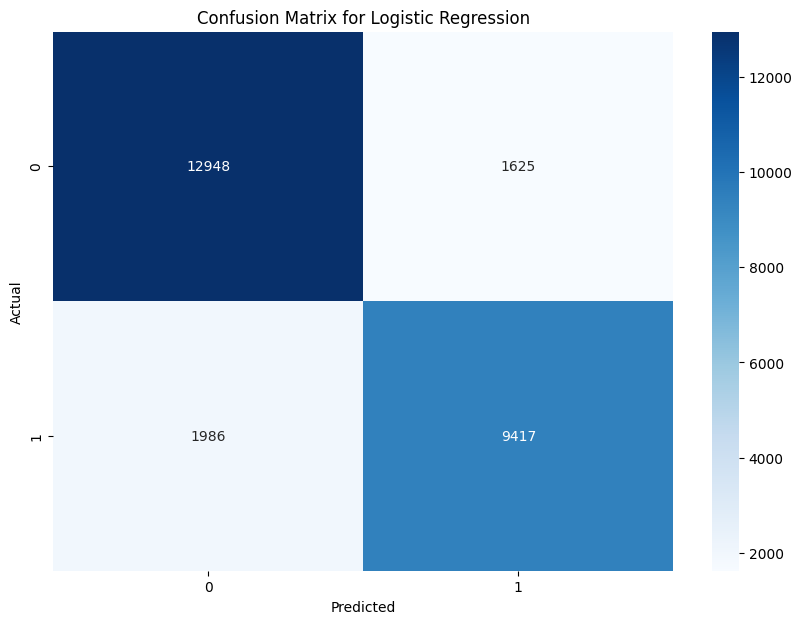

['Models/logistic_regression_model.pkl']

In [78]:
display_metrics(y_test, y_pred_logreg, 'Logistic Regression', results)
joblib.dump(logreg, 'Models/logistic_regression_model.pkl')


4.2. Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Metrics for Random Forest:
Accuracy: 0.939213119802895
Precision: 0.9406171510584859
Recall: 0.9195825659914058
F1 Score: 0.9299809321094408
ROC AUC Score: 0.9370780461879077
Confusion Matrix:
[[13911   662]
 [  917 10486]]
------------------------------


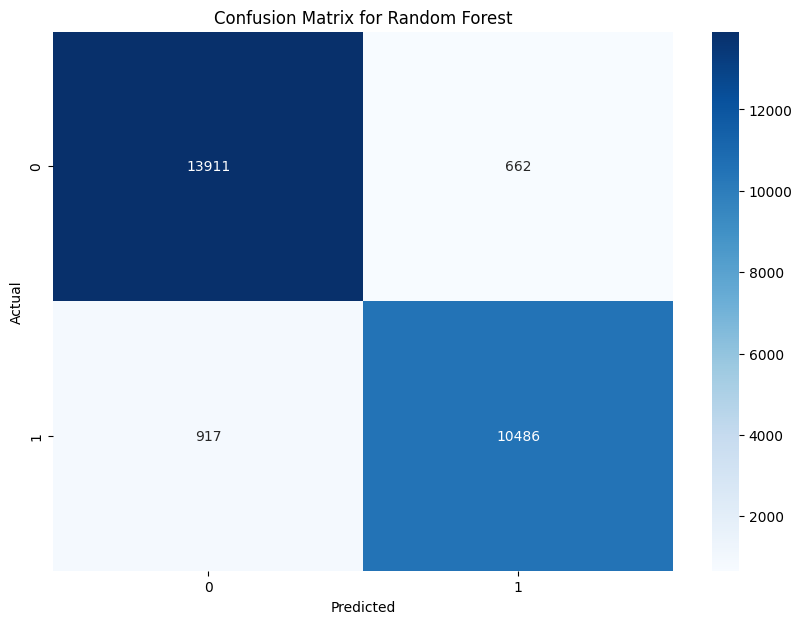

['Models/random_forest_model.pkl']

In [80]:
display_metrics(y_test, y_pred_rf, 'Random Forest', results)
joblib.dump(rf, 'Models/random_forest_model.pkl')

4.4. Tensorflow NN

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

nn_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8727 - loss: 0.3207 - val_accuracy: 0.9284 - val_loss: 0.1807
Epoch 2/100
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9198 - loss: 0.1989 - val_accuracy: 0.9307 - val_loss: 0.1662
Epoch 3/100
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9275 - loss: 0.1782 - val_accuracy: 0.9362 - val_loss: 0.1535
Epoch 4/100
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9303 - loss: 0.1665 - val_accuracy: 0.9410 - val_loss: 0.1479
Epoch 5/100
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9342 - loss: 0.1597 - val_accuracy: 0.9413 - val_loss: 0.1434
Epoch 6/100
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9355 - loss: 0.1556 - val_accuracy: 0.9419 - val_loss: 0.1408
Epoch 7/100
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9383 - loss: 0.1505 - val_accuracy: 0.9419 - val_loss: 0.1392
Epoch 8/100
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9396 - loss: 0

In [82]:
y_pred_prob_nn = nn_model.predict(X_test)
y_pred_nn = (y_pred_prob_nn > 0.5).astype("int32")

812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Metrics for Neural Network:
Accuracy: 0.9499153064367108
Precision: 0.9601020222262707
Recall: 0.9243181618872227
F1 Score: 0.9418703364460926
ROC AUC Score: 0.947131289823046
Confusion Matrix:
[[14135   438]
 [  863 10540]]
------------------------------


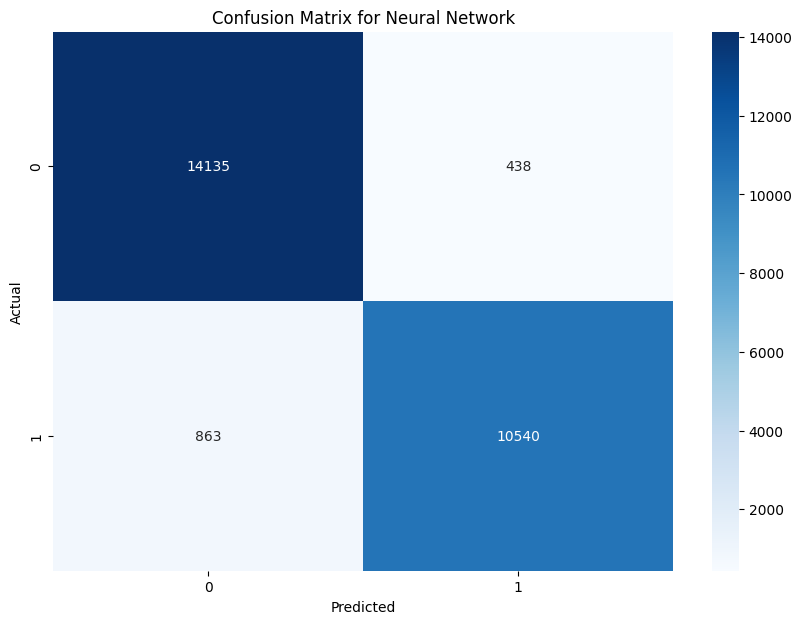

In [83]:
display_metrics(y_test, y_pred_nn, 'Neural Network', results)
nn_model.save('Models/neural_network_model.keras')


5. Compare models

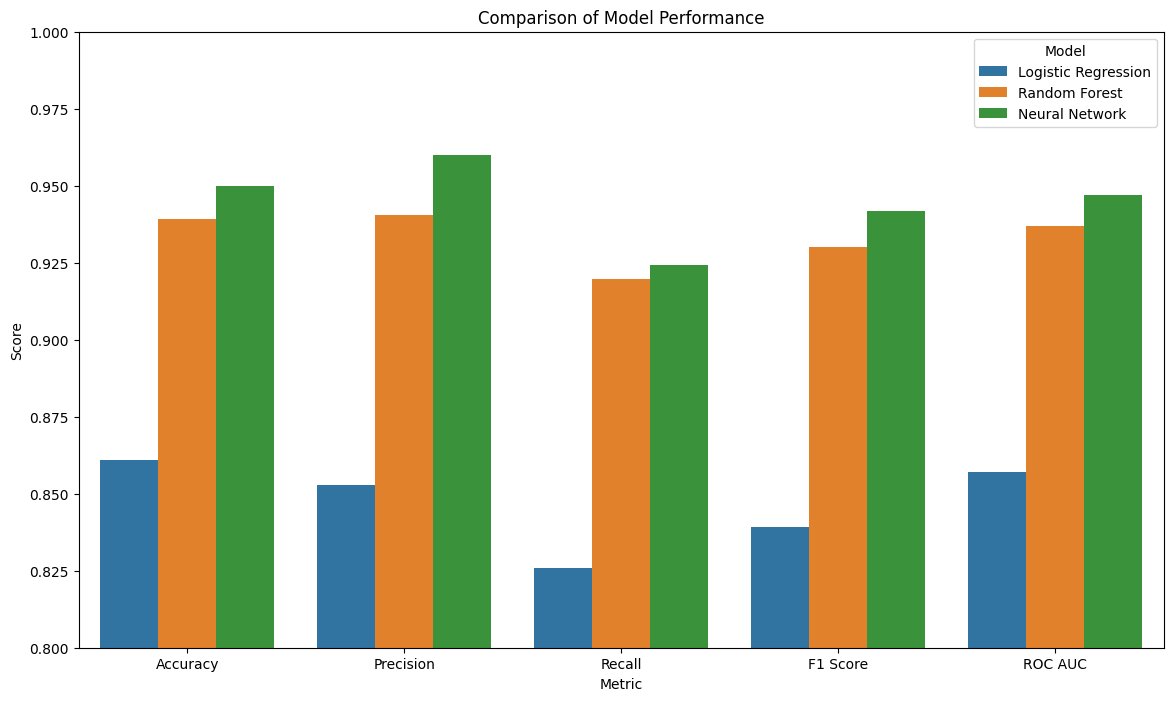

In [84]:
df = pd.DataFrame(results)
df_long = pd.melt(df, id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
                  var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=df_long)
plt.title('Comparison of Model Performance')
plt.ylim(0.8, 1)
plt.savefig('Results/comparison_of_model_performance.png')
plt.show()

plt.close()

In [85]:
df_means = df.set_index('Model').mean(axis=1)
best_model = df_means.idxmax()
print(f'The best overall model is: {best_model}')

The best overall model is: Neural Network


In [86]:
results['Accuracy']

[0.8609870649830613, 0.939213119802895, 0.9499153064367108]